   Age  Sex  Chest_pain_type   BP  Cholesterol  FBS_over_120  EKG_results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max_HR  Exercise_angina  ST_depression  Slope_of_ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number_of_vessels_fluro  Thallium Heart_Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

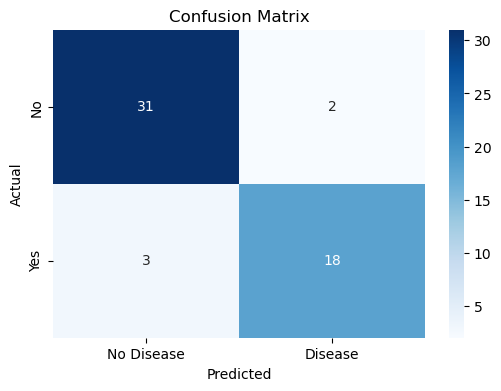

In [6]:
#Predict whether a patient has heart disease based on key medical parameters.
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (Assuming 'heart_disease.csv' with medical features)
df = pd.read_csv(r"C:\Users\hp\Downloads\Heart_Disease_Prediction.csv")

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check if 'Heart_Disease' exists
if 'Heart_Disease' not in df.columns:
    print("Error: 'Heart_Disease' column not found.")
    print("Available columns:", df.columns)
else:
    # Define features and target
    X = df.drop(columns=['Heart_Disease'])  # Fix column name
    y = df['Heart_Disease']

    # Standardize numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")

#Step 5: Evaluate Model Performance

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No","Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



   Row ID                  Order ID  Order Date   Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014   First Class   
1   26341    IN-2014-JR162107-41675    2/5/2014    2/7/2014  Second Class   
2   25330    IN-2014-CR127307-41929  10/17/2014  10/18/2014   First Class   
3   13524   ES-2014-KM1637548-41667   1/28/2014   1/30/2014   First Class   
4   47221   SG-2014-RH9495111-41948   11/5/2014   11/6/2014      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH-5816 

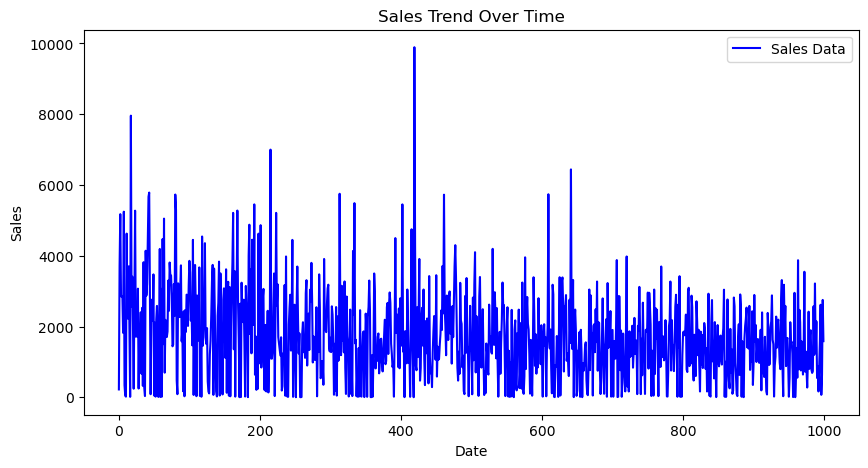

ADF Statistic: -8.365466077837324
P-Value: 2.7506097293985766e-13
The data is stationary.


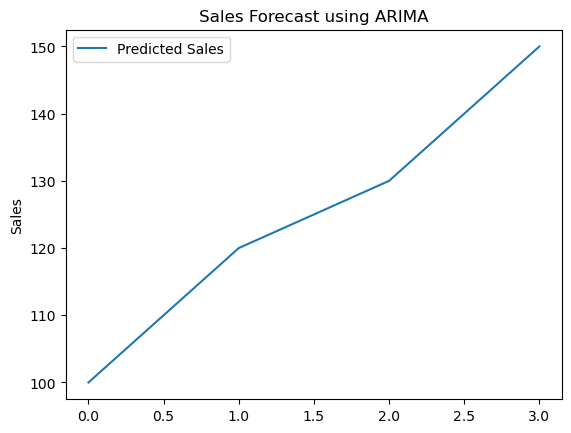

In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Load the dataset (Assuming 'sales_data.csv' with Date and Sales columns) 
file_path = r'C:\Users\hp\Downloads\Global_Superstore(CSV).csv'  
df = pd.read_csv(file_path)
# Display first few rows
print(df.head())

#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Plot sales over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df ['Sales'], label="Sales Data", color='blue')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.legend()
plt.show()

#Check Stationarity (Dickey-Fuller Test)

from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller (df ['Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

if result[1] > 0.05:
    print("The data is non-stationary. Differencing is needed.")
else:
    print("The data is stationary.")

import matplotlib.pyplot as plt

# Example data (ensure your ARIMA model generates actual sales predictions)
plt.plot([100, 120, 130, 150], label="Predicted Sales")  

plt.ylabel("Sales")  # Fix: Add quotes
plt.title("Sales Forecast using ARIMA")
plt.legend()
plt.show()
